In [1]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("BookSTC.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,...,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,...,LKA,Sri Lanka,Non-Saudi,9,NaN,NaN,NaN,NaN,NaN,NaN
1,5/31/2020,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,...,NaN,NaN,Non-Saudi,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,...,SAU,Saudi Arabia,Saudi,1,NaN,NaN,NaN,NaN,NaN,NaN
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,...,BGD,Bangladesh,Non-Saudi,2,NaN,NaN,NaN,NaN,NaN,NaN
4,9/30/2019,1202,Nokia 1202,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,...,BGD,Bangladesh,Non-Saudi,4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4/30/2019,Fast 2,Bird Fast 2,Bird,unknown,unknown,Smartphone,Y,Y,Y,...,SDN,Sudan,Non-Saudi,1,NaN,NaN,NaN,NaN,NaN,NaN
1048571,5/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,...,NaN,NaN,Non-Saudi,11,NaN,NaN,NaN,NaN,NaN,NaN
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,...,SYR,Syria,Non-Saudi,16,NaN,NaN,NaN,NaN,NaN,NaN
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,...,BGD,Bangladesh,Non-Saudi,7,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

CAL_DT               object
MODEL_NAME           object
BRAND_FULL_NAME      object
BRAND_NAME           object
VENDOR_NAME          object
OS_NAME              object
DEVICE_TYPE          object
_2G_FLG              object
_3G_FLG              object
_4G_FLG              object
WIFI_FLG             object
BLUETOOTH_FLG        object
TOUCH_SCREEN_FLG     object
DUAL_SIM_FLG         object
GENDER_TYPE_CD       object
AGE_B                object
NATIONALITY_CD       object
NATIONALITY_NAME     object
SAUDI_NON_SAUDI      object
DEVICE_COUNT         object
Unnamed: 20          object
Unnamed: 21          object
Unnamed: 22          object
Unnamed: 23          object
Unnamed: 24          object
Unnamed: 25         float64
dtype: object

In [7]:
# As the dataset is more than 100000000 i will 
df=df.drop(['MODEL_NAME','VENDOR_NAME','BRAND_FULL_NAME','TOUCH_SCREEN_FLG','DUAL_SIM_FLG','_2G_FLG','_3G_FLG','_4G_FLG','NATIONALITY_CD','WIFI_FLG','BLUETOOTH_FLG','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','NATIONALITY_NAME','Unnamed: 24','Unnamed: 25'],axis=1)

In [8]:
df.head()

,CAL_DT,BRAND_NAME,OS_NAME,DEVICE_TYPE,GENDER_TYPE_CD,AGE_B,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,HTC,Android,Smartphone,Male,36-55,Non-Saudi,9
1,5/31/2020,Nokia,Proprietary,Mobile Phone,Male,<18,Non-Saudi,1
2,1/31/2019,HTC,Android,Smartphone,NaN,26-35,Saudi,1
3,12/31/2019,Nokia,Symbian,Smartphone,Male,18-25,Non-Saudi,2
4,9/30/2019,Nokia,Proprietary,Mobile Phone,NaN,36-55,Non-Saudi,4


In [9]:
#finding most commn brand names
from collections import Counter
Counter(" ".join(df["BRAND_NAME"]).split()).most_common(5)

[('Nokia', 249867),
 ('Sony', 63410),
 ('Lenovo', 62175),
 ('LG', 54579),
 ('HTC', 54309)]

In [10]:
# findin and stor rows related to the top 5 barnds name
search_values=['Nokia','Sony','Lenovo','LG','HTC']
df[df.BRAND_NAME.str.contains('|'.join(search_values ))]
df=df[df.BRAND_NAME.str.contains('|'.join(search_values ))]

In [11]:
# finding unique values
df.SAUDI_NON_SAUDI.unique()


array(['Non-Saudi', 'Saudi'], dtype=object)

In [12]:
df.GENDER_TYPE_CD.unique()

array(['Male', nan, 'Female'], dtype=object)

In [13]:
df.isnull().sum()

CAL_DT                 0
BRAND_NAME             0
OS_NAME                0
DEVICE_TYPE            0
GENDER_TYPE_CD     53200
AGE_B                  0
SAUDI_NON_SAUDI        0
DEVICE_COUNT           0
dtype: int64

In [14]:
df = df.dropna() 
df.count()

CAL_DT             431140
BRAND_NAME         431140
OS_NAME            431140
DEVICE_TYPE        431140
GENDER_TYPE_CD     431140
AGE_B              431140
SAUDI_NON_SAUDI    431140
DEVICE_COUNT       431140
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431140 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   CAL_DT           431140 non-null  object
 1   BRAND_NAME       431140 non-null  object
 2   OS_NAME          431140 non-null  object
 3   DEVICE_TYPE      431140 non-null  object
 4   GENDER_TYPE_CD   431140 non-null  object
 5   AGE_B            431140 non-null  object
 6   SAUDI_NON_SAUDI  431140 non-null  object
 7   DEVICE_COUNT     431140 non-null  object
dtypes: object(8)
memory usage: 29.6+ MB


In [17]:
print(df.isnull().sum())

CAL_DT             0
BRAND_NAME         0
OS_NAME            0
DEVICE_TYPE        0
GENDER_TYPE_CD     0
AGE_B              0
SAUDI_NON_SAUDI    0
DEVICE_COUNT       0
dtype: int64


In [18]:
df = df.dropna() 
df.count()

CAL_DT             431140
BRAND_NAME         431140
OS_NAME            431140
DEVICE_TYPE        431140
GENDER_TYPE_CD     431140
AGE_B              431140
SAUDI_NON_SAUDI    431140
DEVICE_COUNT       431140
dtype: int64

In [19]:
df = df.drop_duplicates()
df.head(5)

,CAL_DT,BRAND_NAME,OS_NAME,DEVICE_TYPE,GENDER_TYPE_CD,AGE_B,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,HTC,Android,Smartphone,Male,36-55,Non-Saudi,9
1,5/31/2020,Nokia,Proprietary,Mobile Phone,Male,<18,Non-Saudi,1
3,12/31/2019,Nokia,Symbian,Smartphone,Male,18-25,Non-Saudi,2
8,6/30/2019,HTC,Android,Smartphone,Male,26-35,Non-Saudi,21
11,5/31/2020,Sony,Android,Smartphone,Male,>55,Non-Saudi,1


In [20]:
#replacing white space
df.replace(r'^\s+$', np.nan, regex=True)

,CAL_DT,BRAND_NAME,OS_NAME,DEVICE_TYPE,GENDER_TYPE_CD,AGE_B,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,HTC,Android,Smartphone,Male,36-55,Non-Saudi,9
1,5/31/2020,Nokia,Proprietary,Mobile Phone,Male,<18,Non-Saudi,1
3,12/31/2019,Nokia,Symbian,Smartphone,Male,18-25,Non-Saudi,2
8,6/30/2019,HTC,Android,Smartphone,Male,26-35,Non-Saudi,21
11,5/31/2020,Sony,Android,Smartphone,Male,>55,Non-Saudi,1
...,...,...,...,...,...,...,...,...
1048488,10/31/2020,HTC,Android,Smartphone,Male,18-25,Saudi,71
1048493,4/30/2020,Nokia,Proprietary,Mobile Phone,Male,NA,Saudi,64
1048518,12/31/2019,Nokia,Other,Smartphone,Male,18-25,Non-Saudi,1
1048521,3/31/2020,Lenovo,Android,Smartphone,Male,NA,Non-Saudi,16


In [21]:
df.GENDER_TYPE_CD.unique()

array(['Male', 'Female'], dtype=object)

In [22]:
df.SAUDI_NON_SAUDI.unique()

array(['Non-Saudi', 'Saudi'], dtype=object)

In [23]:
df.shape

(87473, 8)

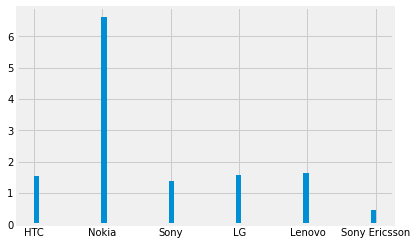

In [24]:
plt.hist(df['BRAND_NAME'],bins = 66, density=True);

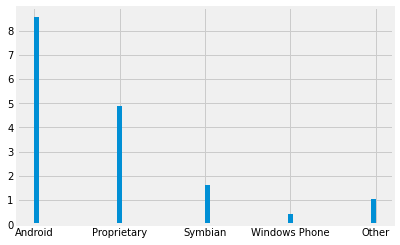

In [25]:
plt.hist(df['OS_NAME'],bins = 66, density=True);

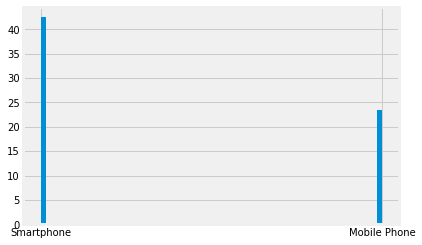

In [26]:
plt.hist(df['DEVICE_TYPE'],bins = 66, density=True);

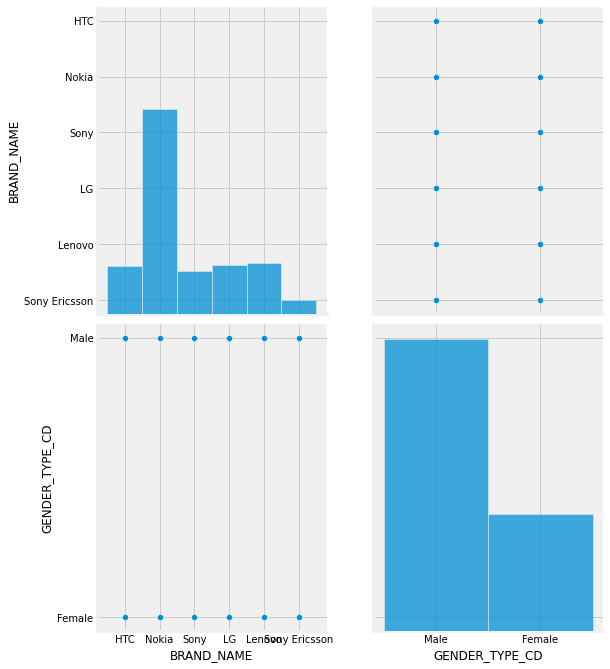

In [27]:
g=sns.pairplot(df, vars=["BRAND_NAME","GENDER_TYPE_CD"])
g.fig.set_size_inches(10,10);

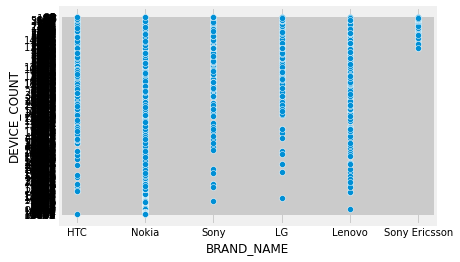

In [28]:
sns.scatterplot(data=df, x="BRAND_NAME", y="DEVICE_COUNT");

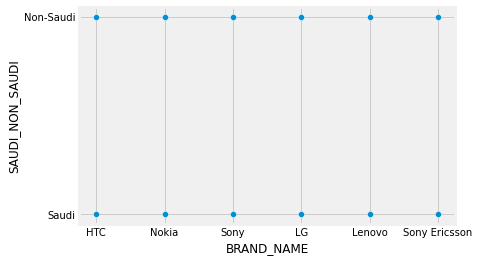

In [29]:
sns.scatterplot(data=df, x="BRAND_NAME", y="SAUDI_NON_SAUDI");

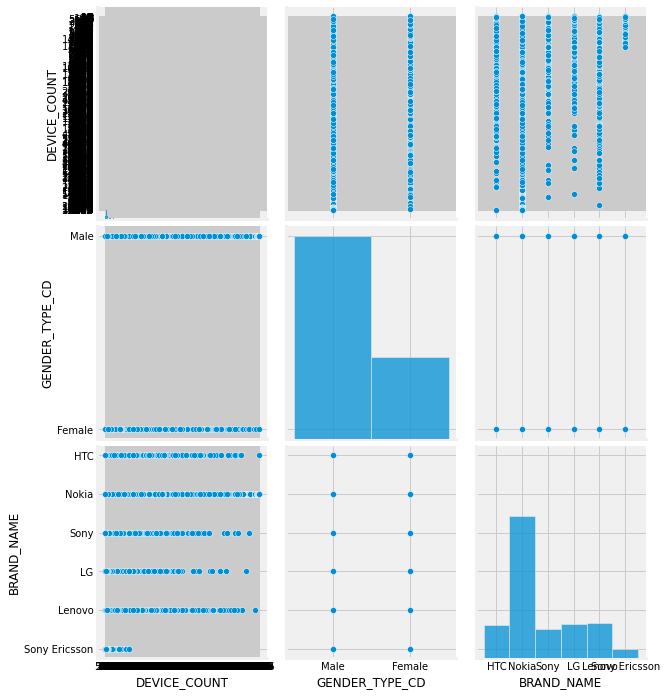

In [30]:
g=sns.pairplot(df, vars=["DEVICE_COUNT","GENDER_TYPE_CD","BRAND_NAME"])
g.fig.set_size_inches(10,10);

In [31]:
df.corr(method='kendall')

""


In [50]:
df

,CAL_DT,BRAND_NAME,OS_NAME,DEVICE_TYPE,GENDER_TYPE_CD,AGE_B,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,HTC,Android,Smartphone,Male,36-55,Non-Saudi,9
1,5/31/2020,Nokia,Proprietary,Mobile Phone,Male,<18,Non-Saudi,1
3,12/31/2019,Nokia,Symbian,Smartphone,Male,18-25,Non-Saudi,2
8,6/30/2019,HTC,Android,Smartphone,Male,26-35,Non-Saudi,21
11,5/31/2020,Sony,Android,Smartphone,Male,>55,Non-Saudi,1
...,...,...,...,...,...,...,...,...
1048488,10/31/2020,HTC,Android,Smartphone,Male,18-25,Saudi,71
1048493,4/30/2020,Nokia,Proprietary,Mobile Phone,Male,NA,Saudi,64
1048518,12/31/2019,Nokia,Other,Smartphone,Male,18-25,Non-Saudi,1
1048521,3/31/2020,Lenovo,Android,Smartphone,Male,NA,Non-Saudi,16


In [ ]:
# here i start modiling

In [51]:
df2=df

In [52]:
df2

,CAL_DT,BRAND_NAME,OS_NAME,DEVICE_TYPE,GENDER_TYPE_CD,AGE_B,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,HTC,Android,Smartphone,Male,36-55,Non-Saudi,9
1,5/31/2020,Nokia,Proprietary,Mobile Phone,Male,<18,Non-Saudi,1
3,12/31/2019,Nokia,Symbian,Smartphone,Male,18-25,Non-Saudi,2
8,6/30/2019,HTC,Android,Smartphone,Male,26-35,Non-Saudi,21
11,5/31/2020,Sony,Android,Smartphone,Male,>55,Non-Saudi,1
...,...,...,...,...,...,...,...,...
1048488,10/31/2020,HTC,Android,Smartphone,Male,18-25,Saudi,71
1048493,4/30/2020,Nokia,Proprietary,Mobile Phone,Male,NA,Saudi,64
1048518,12/31/2019,Nokia,Other,Smartphone,Male,18-25,Non-Saudi,1
1048521,3/31/2020,Lenovo,Android,Smartphone,Male,NA,Non-Saudi,16


In [53]:
# as I faced many issues related mt dataset type, I will make some changes in col

In [55]:
df2['BRAND_NAME']=df2['BRAND_NAME'].str.replace(" ","")

In [56]:
df2.BRAND_NAME.unique()

array(['HTC', 'Nokia', 'Sony', 'LG', 'Lenovo', 'SonyEricsson'],
      dtype=object)

In [57]:
df2.BRAND_NAME[df2.BRAND_NAME=='Nokia']=1
df2.BRAND_NAME[df2.BRAND_NAME=='HTC']=2
df2.BRAND_NAME[df2.BRAND_NAME=='Sony']=3
df2.BRAND_NAME[df2.BRAND_NAME=='LG']=4
df2.BRAND_NAME[df2.BRAND_NAME=='Lenovo']=5
df2.BRAND_NAME[df2.BRAND_NAME=='SonyEricsson']=6


In [58]:
df2['OS_NAME']=df2['OS_NAME'].str.replace(" ","")

In [62]:
#inding most commn os
from collections import Counter
Counter(" ".join(df2["OS_NAME"]).split()).most_common(3)

[('Android', 45330), ('Proprietary', 25927), ('Symbian', 8550)]

In [63]:
search_values=['Android','Proprietary','Symbian']
df2[df2.OS_NAME.str.contains('|'.join(search_values ))]
df2=df[df2.OS_NAME.str.contains('|'.join(search_values ))]

In [64]:
df2.OS_NAME.unique()

array(['Android', 'Proprietary', 'Symbian'], dtype=object)

In [65]:
df2.OS_NAME[df2.OS_NAME=='Android']=1
df2.OS_NAME[df2.OS_NAME=='Symbian']=2
df2.OS_NAME[df2.OS_NAME=='Proprietary']=3


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [67]:
df2['OS_NAME']=df2['OS_NAME'].astype(str).astype(int)


<ipython-input-67-972fb436ded4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['OS_NAME']=df2['OS_NAME'].astype(str).astype(int)


In [68]:
df2.DEVICE_TYPE.unique()

array(['Smartphone', 'Mobile Phone'], dtype=object)

In [70]:
df2['DEVICE_TYPE']=df2['DEVICE_TYPE'].str.replace(" ","")


<ipython-input-70-7e3c5db96e9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DEVICE_TYPE']=df2['DEVICE_TYPE'].str.replace(" ","")


In [71]:
df2.DEVICE_TYPE[df2.DEVICE_TYPE=='Smartphone']=1
df2.DEVICE_TYPE[df2.DEVICE_TYPE=='MobilePhone']=2

<ipython-input-71-d8cd7e650231>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.DEVICE_TYPE[df2.DEVICE_TYPE=='Smartphone']=1
<ipython-input-71-d8cd7e650231>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.DEVICE_TYPE[df2.DEVICE_TYPE=='MobilePhone']=2


In [72]:
df2.GENDER_TYPE_CD.unique()

array(['Male', 'Female'], dtype=object)

In [73]:
df2['GENDER_TYPE_CD']=df2['GENDER_TYPE_CD'].str.replace(" ","")


<ipython-input-73-9aefe28549a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['GENDER_TYPE_CD']=df2['GENDER_TYPE_CD'].str.replace(" ","")


In [74]:
df2.GENDER_TYPE_CD[df2.GENDER_TYPE_CD=='Male']=1
df2.GENDER_TYPE_CD[df2.GENDER_TYPE_CD=='Female']=2

<ipython-input-74-4e306b6e44c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.GENDER_TYPE_CD[df2.GENDER_TYPE_CD=='Male']=1
<ipython-input-74-4e306b6e44c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.GENDER_TYPE_CD[df2.GENDER_TYPE_CD=='Female']=2


In [77]:
df2.AGE_B.unique()

array(['36-55', '<18', '18-25', '26-35', '>55', 'NA'], dtype=object)

In [76]:
df2['AGE_B']=df2['AGE_B'].str.replace(" ","")


<ipython-input-76-dc95796e33ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AGE_B']=df2['AGE_B'].str.replace(" ","")


In [78]:
df2.AGE_B[df2.AGE_B=='>55']=1
df2.AGE_B[df2.AGE_B=='36-55']=2
df2.AGE_B[df2.AGE_B=='26-35']=3
df2.AGE_B[df2.AGE_B=='18-25']=4
df2.AGE_B[df2.AGE_B=='<18']=5
df2.AGE_B[df2.AGE_B=='NA']=6


<ipython-input-78-10c0d43fc299>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.AGE_B[df2.AGE_B=='>55']=1
<ipython-input-78-10c0d43fc299>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.AGE_B[df2.AGE_B=='36-55']=2
<ipython-input-78-10c0d43fc299>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.AGE_B[df2.AGE_B=='26-35']=3
<ipython-input-78-10c0d43fc299>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [79]:
df2

,CAL_DT,BRAND_NAME,OS_NAME,DEVICE_TYPE,GENDER_TYPE_CD,AGE_B,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,2,1,1,1,2,Non-Saudi,9
1,5/31/2020,1,3,2,1,5,Non-Saudi,1
3,12/31/2019,1,2,1,1,4,Non-Saudi,2
8,6/30/2019,2,1,1,1,3,Non-Saudi,21
11,5/31/2020,3,1,1,1,1,Non-Saudi,1
...,...,...,...,...,...,...,...,...
1048481,11/30/2019,1,3,2,2,2,Saudi,24
1048488,10/31/2020,2,1,1,1,4,Saudi,71
1048493,4/30/2020,1,3,2,1,6,Saudi,64
1048521,3/31/2020,5,1,1,1,6,Non-Saudi,16


In [80]:
df2['SAUDI_NON_SAUDI']=df2['SAUDI_NON_SAUDI'].str.replace(" ","")


<ipython-input-80-47e42009cacf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SAUDI_NON_SAUDI']=df2['SAUDI_NON_SAUDI'].str.replace(" ","")


In [81]:
df2.SAUDI_NON_SAUDI.unique()

array(['Non-Saudi', 'Saudi'], dtype=object)

In [82]:
df2.SAUDI_NON_SAUDI[df2.SAUDI_NON_SAUDI=='Non-Saudi']=1
df2.SAUDI_NON_SAUDI[df2.SAUDI_NON_SAUDI=='Saudi']=2

<ipython-input-82-993adbcf366c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.SAUDI_NON_SAUDI[df2.SAUDI_NON_SAUDI=='Non-Saudi']=1
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-82-993adbcf366c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.SAUDI_NON_SAUDI[df2.SAUDI_NON_SAUDI=='Saudi']=2


In [85]:
df2[["BRAND_NAME","OS_NAME","DEVICE_TYPE"]] = df2[["BRAND_NAME", "OS_NAME","DEVICE_TYPE"]].apply(pd.to_numeric)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [86]:
df2[["GENDER_TYPE_CD","AGE_B","SAUDI_NON_SAUDI","DEVICE_COUNT"]] = df2[["GENDER_TYPE_CD","AGE_B","SAUDI_NON_SAUDI","DEVICE_COUNT"]].apply(pd.to_numeric)

In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79807 entries, 0 to 1048561
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CAL_DT           79807 non-null  object
 1   BRAND_NAME       79807 non-null  int64 
 2   OS_NAME          79807 non-null  int64 
 3   DEVICE_TYPE      79807 non-null  int64 
 4   GENDER_TYPE_CD   79807 non-null  int64 
 5   AGE_B            79807 non-null  int64 
 6   SAUDI_NON_SAUDI  79807 non-null  int64 
 7   DEVICE_COUNT     79807 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 5.5+ MB


In [88]:
df3=df2

In [89]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79807 entries, 0 to 1048561
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CAL_DT           79807 non-null  object
 1   BRAND_NAME       79807 non-null  int64 
 2   OS_NAME          79807 non-null  int64 
 3   DEVICE_TYPE      79807 non-null  int64 
 4   GENDER_TYPE_CD   79807 non-null  int64 
 5   AGE_B            79807 non-null  int64 
 6   SAUDI_NON_SAUDI  79807 non-null  int64 
 7   DEVICE_COUNT     79807 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 5.5+ MB


In [109]:
# Logistic regression visualization utility function
def generate_logreg_vis(beta=-.05):
    
    # draw feature values and use beta to calculate predicted probability
    # of positive class for each feature value
    x = np.random.uniform(low=-1, high=1, size=150) * 100
    p = 1 / (1 + np.exp(-(beta*x))) # logistic regression function
    
    # plot predicted probs against the feature 
    plt.scatter(x, p)
    plt.title('Probability of Default vs. Credit Rating Score')
    plt.ylabel('Predicted Probability of Default')
    plt.xlabel('Credit Rating Score')
    
    # 50% probability threshold
    plt.gca().axhline(.5,c='k',ls='--',lw=1)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X = df3[['BRAND_NAME', 'OS_NAME','DEVICE_TYPE', 'GENDER_TYPE_CD','AGE_B']]
y = df3['SAUDI_NON_SAUDI']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [96]:
predictions = logmodel.predict(X_test)

In [97]:
from sklearn.metrics import classification_report

In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.66      0.96      0.78     17006
           2       0.56      0.10      0.17      9331

    accuracy                           0.65     26337
   macro avg       0.61      0.53      0.48     26337
weighted avg       0.63      0.65      0.56     26337



In [99]:
df4=df3

In [100]:
df4

,CAL_DT,BRAND_NAME,OS_NAME,DEVICE_TYPE,GENDER_TYPE_CD,AGE_B,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,2,1,1,1,2,1,9
1,5/31/2020,1,3,2,1,5,1,1
3,12/31/2019,1,2,1,1,4,1,2
8,6/30/2019,2,1,1,1,3,1,21
11,5/31/2020,3,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
1048481,11/30/2019,1,3,2,2,2,2,24
1048488,10/31/2020,2,1,1,1,4,2,71
1048493,4/30/2020,1,3,2,1,6,2,64
1048521,3/31/2020,5,1,1,1,6,1,16


In [102]:
X = df4[['BRAND_NAME', 'OS_NAME','DEVICE_TYPE', 'SAUDI_NON_SAUDI','AGE_B']]
y = df4['GENDER_TYPE_CD']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [106]:
predictions = logmodel.predict(X_test)

In [107]:
from sklearn.metrics import classification_report

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.72      1.00      0.84     18902
           2       0.00      0.00      0.00      7435

    accuracy                           0.72     26337
   macro avg       0.36      0.50      0.42     26337
weighted avg       0.52      0.72      0.60     26337



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
df5=df2

In [111]:
df4

,CAL_DT,BRAND_NAME,OS_NAME,DEVICE_TYPE,GENDER_TYPE_CD,AGE_B,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,2,1,1,1,2,1,9
1,5/31/2020,1,3,2,1,5,1,1
3,12/31/2019,1,2,1,1,4,1,2
8,6/30/2019,2,1,1,1,3,1,21
11,5/31/2020,3,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
1048481,11/30/2019,1,3,2,2,2,2,24
1048488,10/31/2020,2,1,1,1,4,2,71
1048493,4/30/2020,1,3,2,1,6,2,64
1048521,3/31/2020,5,1,1,1,6,1,16


In [112]:
lm1 = LogisticRegression(C=1000) # setting C very high essentially removes regularization
lm1.fit(X_train[['BRAND_NAME']], y_train)

LogisticRegression(C=1000)

In [113]:
lm1.score(X_train[['BRAND_NAME']], y_train)

0.7174116326912288